In [1]:
# enable autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import random

import scvi
scvi.settings.seed = 0
import scanpy as sc
import anndata as ad
import torch
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.sparse import csr_matrix
torch.set_float32_matmul_precision('medium')
import warnings
warnings.simplefilter("ignore", UserWarning)
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns

# from scfair.evaluate import *
# from scfair_reproducibility.evaluation.metrics import *

from dis2p import dis2pvi_cE as dvi
# from dis2p_reproducibility.dis2p_defunct import dis2pvi_cE as dvi
import biolord
from scvi.model.base import BaseModelClass
from scDisInFact import scdisinfact, create_scdisinfact_dataset

# from dis2p_reproducibility.dis2p_defunct import dis2pvi as dvi

import scib

from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

Global seed set to 0
Global seed set to 0


In [4]:
%cd /nfs/team205/sm58/packages/dis2p_trials/dis2p_reproduciblity

/nfs/team205/sm58/packages/dis2p_trials/dis2p_reproduciblity


In [5]:
!pwd

/nfs/team205/sm58/packages/dis2p_trials/dis2p_reproduciblity


In [6]:
from metrics.metrics import *

In [7]:
cats = ['cell_type', 'condition']
pre_path = '/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/models/'

dis2p_model_path = 'kang_dis2p_cE_split_CD4 T/' + 'maxEpochs_350_split_split_CD4 T_reconW_28.55_cfWeight_0.7873_beta_0.003_clf_0.8149_adv_0.0138_advp_5_n_cf_1_lr_0.001_wd_7.78e-05_new_cf_True_dropout_0.2_n_hidden_128_n_latent_32_n_layers_2/'
biolord_model_path = 'biolord/kang_biolord_basicSettings_nb_split_CD4 T/'
scdisinfact_model_path = 'scDisInfact/kang_model_40latent_300ep_split_CD4 T_[8, 2, 2]_[0.0001, 0.0001, 1e-05, 0.01, 1, 1]_64_300_0.0005.pth'

In [10]:
adata = sc.read_h5ad('data/kang_normalized_hvg.h5ad')
adata_biolord = sc.read_h5ad('data/kang_normalized_hvg.h5ad')

In [26]:
create_cats_idx(adata, cats)

AnnData object with n_obs × n_vars = 13576 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'cov_cond', 'split_CD14 Mono', 'split_CD4 T', 'split_T', 'split_CD8 T', 'split_B', 'split_DC', 'split_CD16 Mono', 'split_NK', 'cov_condition', '_scvi_batch', '_scvi_labels', 'lineage', 'cell_type_idx', 'condition_idx'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'condition_colors', 'hvg', 'lineage_colors', 'log1p', 'neighbors', 'rank_genes_groups_cov', 'rank_genes_groups_pval0.05', 'rank_genes_groups_split_CD4T', 'seurat_annotations_colors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'dis2p_cE_Z_0', 'dis2p_cE_Z_1', 'dis2p_cE_Z_2', 'scDisInFact_0', 'scDisInFact_1', 'scDisInFact_2', 'scfindvi_0', 'scfindvi_1', 'scfindvi_2', 'scfindvi_Z_0', 'scfindvi_Z_1', 'scfindvi_Z_2', '

In [27]:
create_cats_idx(adata_biolord, cats)

AnnData object with n_obs × n_vars = 13576 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'cov_cond', 'split_CD14 Mono', 'split_CD4 T', 'split_T', 'split_CD8 T', 'split_B', 'split_DC', 'split_CD16 Mono', 'split_NK', 'cov_condition', '_scvi_batch', '_scvi_labels', 'lineage', '_indices', '_scvi_cell_type', '_scvi_condition', 'cell_type_idx', 'condition_idx'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'condition_colors', 'hvg', 'lineage_colors', 'log1p', 'neighbors', 'rank_genes_groups_cov', 'rank_genes_groups_pval0.05', 'rank_genes_groups_split_CD4T', 'seurat_annotations_colors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'dis2p_cE_Z_0', 'dis2p_cE_Z_1', 'dis2p_cE_Z_2', 'biolord_1', 'biolord_2'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
model = dvi.Dis2pVI_cE.load(f"{pre_path}/{dis2p_model_path}", adata=adata)

INFO     File /lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/models//kang_dis2p_cE_split_CD4                  
         T/maxEpochs_350_split_split_CD4                                                                           
         T_reconW_28.55_cfWeight_0.7873_beta_0.003_clf_0.8149_adv_0.0138_advp_5_n_cf_1_lr_0.001_wd_7.78e-05_new_cf_
         True_dropout_0.2_n_hidden_128_n_latent_32_n_layers_2/model.pt already downloaded                          


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [12]:
biolord_model = biolord.Biolord.load(f"{pre_path}/{biolord_model_path}", adata=adata_biolord)

INFO     File                                                                                                      
         /lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/models//biolord/kang_biolord_basicSettings_nb_split_CD
         4 T/model.pt already downloaded                                                                           


Global seed set to 42


In [13]:
# declare latent dimensions, we have two condition types, so there are three element corresponding to 
# shared-bio factor, unshared-bio factor for condition 1, unshared-bio factor for condition 2
# default setting of hyper-parameters
reg_mmd_comm = 1e-4
reg_mmd_diff = 1e-4
reg_kl_comm = 1e-5
reg_kl_diff = 1e-2
reg_class = 1
reg_gl = 1

# Ks = [40, 40, 40]
Ks = [8, 2, 2]
batch_size = 64
nepochs = 100
interval = 10
lr = 5e-4

lambs = [reg_mmd_comm, reg_mmd_diff, reg_kl_comm, reg_kl_diff, reg_class, reg_gl]
batch_size = 64
adata_ = adata[adata.layers['counts'].sum(1) != 0].copy()
counts = adata_.layers['counts'].copy()
meta_cells = adata_.obs.copy()
meta_cells['one'] = pd.Categorical([1 for _ in range(adata_.n_obs)])

condition_key = ['cell_type', 'condition']

data_dict = create_scdisinfact_dataset(counts, meta_cells, condition_key = condition_key, batch_key = "one")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scdisinfact_model = scdisinfact(data_dict = data_dict, Ks = Ks, batch_size = batch_size, interval = interval, lr = lr, 
                    reg_mmd_comm = reg_mmd_comm, reg_mmd_diff = reg_mmd_diff, reg_gl = reg_gl, reg_class = reg_class, 
                    reg_kl_comm = reg_kl_comm, reg_kl_diff = reg_kl_diff, seed = 0, device = device)
scdisinfact_model.load_state_dict(torch.load(f"{pre_path}/{scdisinfact_model_path}", map_location = device))

Sanity check...
Finished.
Create scDisInFact datasets...
Finished.


<All keys matched successfully>

In [14]:
attr_names = cats + ['average']
method2metrics_MIG = {}
method2metrics_MIPG = {}
method2metrics_DP = {}
method2metrics_EO = {}
method2metrics_clf = {}
method2metrics_clf_not = {}

# BIOLORD

In [37]:
latent_unknowns, _ = biolord_model.get_latent_representation_adata(adata=adata_biolord, nullify_attribute=None)
adata_biolord.obsm[f"biolord_Z_0"] = latent_unknowns.X

for i, c in enumerate(cats):
    nullify_attribute = [cat for cat in cats if cat != c]
    _, latent_adata = biolord_model.get_latent_representation_adata(adata=adata_biolord, nullify_attribute=nullify_attribute)
    adata_biolord.obsm[f"biolord_Z_{i+1}"] = latent_adata.X
    
    nullify_attribute_not = [c]
    _, latent_adata = biolord_model.get_latent_representation_adata(adata=adata_biolord, nullify_attribute=nullify_attribute_not)
    adata_biolord.obsm[f"biolord_Z_not_{i+1}"] = latent_adata.X

In [39]:
module_name = "biolord"
#y_name = 'nCount_RNA' 

MI, MI_not_max, MI_not, MI_dif_max, MI_dif, maxMIG, concatMIG = Mixed_KSG_MI_metrics(adata_biolord, cats, module_name)


Method: biolord
Mixed_KSG Mutual Information metrics
MI(Z_1 ; S_1) = 0.1655,  MI((Z - Z_1) ; S_1) = -0.0480, max MI((Z_j!=1) ; S_1) = -0.0480
MI(Z_2 ; S_2) = 0.0087,  MI((Z - Z_2) ; S_2) = 0.0297, max MI((Z_j!=2) ; S_2) = 0.0088
maxMIG = 0.0618, concatMIG = 0.0467


# scDisInFact

In [18]:
data_dict["datasets"]

In [32]:
# one forward pass
z_cs = []
z_ds = []
zs = []

# loop through all training count matrices
for dataset in data_dict["datasets"]:
    with torch.no_grad():
        # pass through the encoders
        dict_inf = scdisinfact_model.inference(counts = dataset.counts_norm.to(scdisinfact_model.device), batch_ids = dataset.batch_id[:,None].to(scdisinfact_model.device), print_stat = True)
        # pass through the decoder
        dict_gen = scdisinfact_model.generative(z_c = dict_inf["mu_c"], z_d = dict_inf["mu_d"], batch_ids = dataset.batch_id[:,None].to(scdisinfact_model.device))
        z_c = dict_inf["mu_c"]
        z_d = dict_inf["mu_d"]
        mu = dict_gen["mu"]            
        z_ds.append([x.cpu().detach().numpy() for x in z_d])
        z_cs.append(z_c.cpu().detach().numpy())

# shared-bio factor, concatenate across all training matrices
z_cs = np.concatenate(z_cs, axis = 0)
adata.obsm[f'scDisInFact_Z_0'] = z_cs
# unshared-bio factors for conditions
z_ds_cond = []
for i in range(len(cats)):
    z_ds_cond_i = np.concatenate([x[i] for x in z_ds], axis = 0)
    z_ds_cond_not_i = np.concatenate([x[i] for x in z_ds for j in range(len(cats)) if j!=i], axis = 0)
    z_ds_cond.append(z_ds_cond_i)
    adata.obsm[f'scDisInFact_Z_{i+1}'] = z_ds_cond_i
    adata.obsm[f'scDisInFact_Z_not_{i+1}'] = z_ds_cond_not_i





mean z_c: 0.15161
mean var z_c: 0.13787
mean z_d0: 0.31631
mean var z_d0: 0.76221
mean z_d1: -2.37562
mean var z_d1: 0.78501
mean z_c: 0.10590
mean var z_c: 0.12649
mean z_d0: 0.30114
mean var z_d0: 0.77195
mean z_d1: 2.44280
mean var z_d1: 0.88589
mean z_c: -0.03190
mean var z_c: 0.05665
mean z_d0: 6.60099
mean var z_d0: 0.62721
mean z_d1: -2.35500
mean var z_d1: 0.80247
mean z_c: -0.03927
mean var z_c: 0.06038
mean z_d0: 6.87406
mean var z_d0: 0.66712
mean z_d1: 2.59986
mean var z_d1: 0.87661
mean z_c: -0.10539
mean var z_c: 0.07105
mean z_d0: 8.20877
mean var z_d0: 0.60911
mean z_d1: -2.42122
mean var z_d1: 0.79970
mean z_c: -0.11473
mean var z_c: 0.07224
mean z_d0: 8.35658
mean var z_d0: 0.67076
mean z_d1: 2.45290
mean var z_d1: 0.88537
mean z_c: 0.12293
mean var z_c: 0.10331
mean z_d0: 2.40789
mean var z_d0: 0.39749
mean z_d1: -2.36501
mean var z_d1: 0.80121
mean z_c: 0.03732
mean var z_c: 0.11197
mean z_d0: 1.00932
mean var z_d0: 0.56612
mean z_d1: 1.42114
mean var z_d1: 0.89304


In [33]:
module_name = "scDisInFact"
y_name = 'nCount_RNA' 

MI, MI_not_max, MI_not, MI_dif_max, MI_dif, maxMIG, concatMIG = Mixed_KSG_MI_metrics(adata, cats, module_name)

# DP, EO
# create_cats_idx(adata, ['NRP'])
# y_name = 'NRP_idx'
# acc, DP_diff, EO_diff = fair_clf_metrics(adata, cats, y_name, module_name)



Method: scDisInFact
Mixed_KSG Mutual Information metrics
MI(Z_1 ; S_1) = 0.0286,  MI((Z - Z_1) ; S_1) = 0.0286, max MI((Z_j!=1) ; S_1) = 0.0278
MI(Z_2 ; S_2) = 0.0688,  MI((Z - Z_2) ; S_2) = 0.0688, max MI((Z_j!=2) ; S_2) = 0.2824
maxMIG = -0.1543, concatMIG = 0.0000


# scFindVI

In [24]:
adata.obsm[f'scfindvi_Z_0'] = model.get_latent_representation(nullify_cat_covs_indices=[s for s in range(len(cats))], nullify_shared=False)

for i in range(len(cats)):
    null_idx = [s for s in range(len(cats)) if s != i]
    adata.obsm[f'scfindvi_Z_{i+1}'] = model.get_latent_representation(nullify_cat_covs_indices=null_idx, nullify_shared=True)
    # Z_{-i}
    adata.obsm[f'scfindvi_Z_not_{i+1}'] = model.get_latent_representation(nullify_cat_covs_indices=[i], nullify_shared=False)


In [28]:
module_name = "scfindvi"

MI, MI_not_max, MI_not, MI_dif_max, MI_dif, maxMIG, concatMIG = Mixed_KSG_MI_metrics(adata, cats, module_name)

# DP, EO
# create_cats_idx(adata, ['NRP'])
# y_name = 'NRP_idx'
# acc, DP_diff, EO_diff = fair_clf_metrics(adata, cats, y_name, module_name)



Method: scfindvi
Mixed_KSG Mutual Information metrics
MI(Z_1 ; S_1) = 0.9632,  MI((Z - Z_1) ; S_1) = 0.3284, max MI((Z_j!=1) ; S_1) = 0.1863
MI(Z_2 ; S_2) = 0.0000,  MI((Z - Z_2) ; S_2) = 0.0000, max MI((Z_j!=2) ; S_2) = 0.0000
maxMIG = 0.2250, concatMIG = 0.1839


KeyError: 'NRP'

# Plot

In [40]:
import matplotlib.pyplot as plt

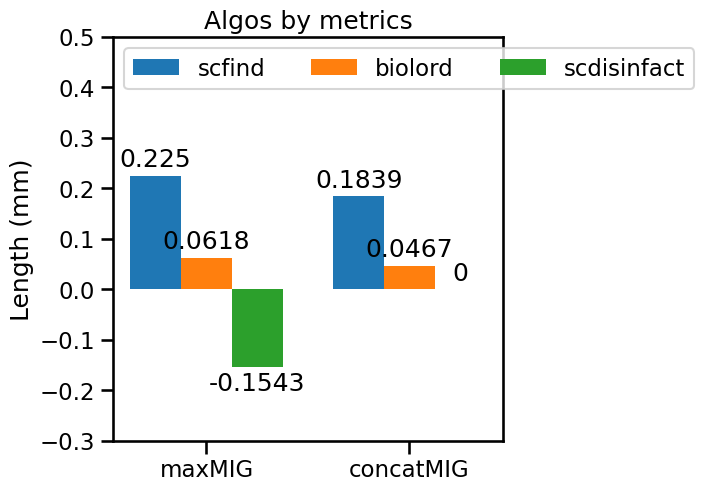

In [43]:
metrics_ = ("maxMIG", "concatMIG")
algos = {
    'scfind': (0.2250, 0.1839),
    'biolord': (0.0618, 0.0467),
    'scdisinfact': (-0.1543, 0.0000),
}

x = np.arange(len(metrics_))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in algos.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Algos by metrics')
ax.set_xticks(x + width, metrics_)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.3, 0.5)

plt.show()